In [2]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### 1 task

In [3]:
def generate(n):
    return ss.cauchy(scale=5.65).rvs(size=n)

data = generate(1000000)
q1, q2, q3 = ss.mstats.mquantiles(data, prob=[0.25, 0.5, 0.75])
print("Scale estimation:", (q3-q1)/2)

Scale estimation: 5.654612616132242


##### 2 task

In [4]:
import numpy as np

def weighted_corr(sample: np.array, weights: np.array) -> float:
    def weighted_mean(x, w):
        return np.average(x, weights=w)
    
    def weighted_cov(x, y, w):
        return np.average((x - weighted_mean(x, w)) * (y - weighted_mean(y, w)), weights=w)

    x = sample[:, 0]
    y = sample[:, 1]
    weighted_corr_val = weighted_cov(x, y, weights) / np.sqrt(weighted_cov(x, x, weights) * weighted_cov(y, y, weights))
    print(weighted_corr_val)
    return weighted_corr_val
    # sample.shape = (n, 2)



In [5]:
sample = np.array([[1,2,3], [4,5,6]]).T
sample.shape
sample[:, 0]

array([1, 2, 3])

##### 3 task

In [6]:
from scipy.stats import norm
 
# setting the values of
# mean and S.D.
mean = 0
SD = 1
 
# value of cdf between one, two
# and three S.D. around the mean
two_sd = norm.cdf(2 * SD, mean, SD) - norm.cdf(-2 * SD, mean, SD)
 
# printing the value of fractions
# within each band
print("Fraction of values out of two SD =", 1 - two_sd)




Fraction of values out of two SD = 0.04550026389635842


In [7]:
import numpy as np
from scipy.special import gamma, gdtr
from scipy.integrate import quad

def test(q, n):
    max_value = 1000
    data = np.linspace(0, max_value, 1000)


    return 0.023, 0.023


def exact_old(q, n):
    max_value = 100
    data = np.linspace(0, max_value, 1000)
    alpha = n 
    beta = q/n

    def integrand(x, alpha, beta):
        return ((beta**alpha)*x**(alpha-1)*np.exp(-(beta)*x)/gamma(alpha))
    
    mu = alpha/beta
    sigma = np.sqrt(alpha/beta**2)


    I_L = quad(integrand, mu + 2*sigma, max_value, args=(alpha,beta))
    # print(I_L[0])

    I_R = quad(integrand, 0, mu - 2*sigma, args=(alpha,beta))
    # print(I_R[0])
    
    # plt.vlines(alpha/beta + np.sqrt(sigma), ymin=0, ymax=max(integrand(data, alpha, beta)))
    # plt.plot(data, integrand(data, alpha, beta))


    return I_L[0], I_R[0]

def exact(q, n):
    max_value = 10000
    data = np.linspace(0, max_value, 10000)
    alpha = n 
    beta = q/n

    
    
    mu = alpha/beta
    sigma = np.sqrt(alpha/beta**2)

    I_L = 1 - gdtr(beta, alpha, mu + 2*sigma)
    I_R = gdtr(beta, alpha, mu - 2*sigma)
    
    # plt.vlines(alpha/beta + np.sqrt(sigma), ymin=0, ymax=max(integrand(data, alpha, beta)))
    # plt.plot(data, integrand(data, alpha, beta))


    return I_L, I_R

print(exact_old(2,10))
print(exact(2,10))
# plt.plot(np.linspace(0, 5), expon.pdf(scale = 1/0.5, x=np.linspace(0, 5)), color='r')
# plt.plot(np.linspace(0, 5), expon.pdf(scale = 1/1.5, x=np.linspace(0, 5)), color='g')

(0.031858699451374116, 0.004634706298986597)
(0.03685411175968156, 0.004634706298986598)


##### 4 task

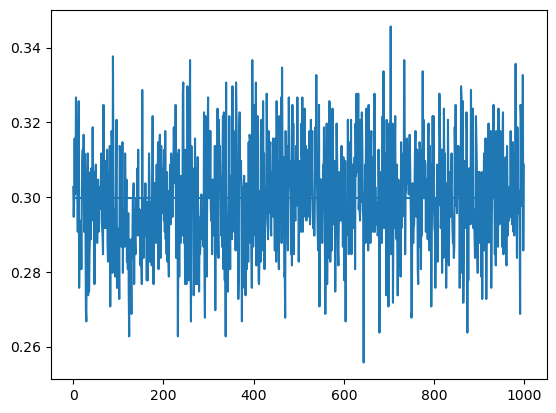

In [11]:
def generate(n: int) -> np.array:
    p = 0.6
    q = 0.4
    # 0 - sunny, 1 - rainy
    # initial state
    data_weather = []
    data = []
    weather = np.random.randint(0, 2)
    data_weather.append(weather)
    data.append(0)
    for i in range(n):
        weather = np.random.randint(0, 2)
        data_weather.append(weather)
        if (weather == 1):
            activity = np.random.choice(np.arange(0, 3), p=[0.1, 0.4, 0.5]) 
        else:
            activity = np.random.choice(np.arange(0, 3), p=[0.6, 0.3, 0.1])
        data.append(activity)    
    return np.array(data)


prob_arr = []
for i in range(1000):
    data = generate(1000)
    prob = (list(data).count(2))/len(data)
    prob_arr.append(prob)
    
plt.plot(prob_arr)
plt.hlines(np.array(prob_arr).mean(), xmin=0, xmax=len(prob_arr))
